In [2]:
#### Load in data ####

import os
import cv2
import numpy as np
import pandas as pd
from itertools import product
from tqdm import tqdm
from utils import load_images_by_domain, split_images

# Define paths
img_dir = "../OfficeCaltechDomainAdaptation/images"

# Load images by domain
data_by_domain = load_images_by_domain(
    img_dir=img_dir,
    target_size=(300, 300),  # Standardized size
    method="pad",           # Use padding to maintain aspect ratio
    seed=888                # Seed for reproducibility
)

# Split images: Combine amazon and caltech10 into train/val/test
train_data, val_data, test_data = split_images(
    data_by_domain=data_by_domain,
    train_domains=["amazon", "caltech10"],  # Combine these for training and validation
    test_domains=[],                        # Use part of amazon and caltech10 for testing
    train_split=0.6,                        # 60% for training
    val_split=0.2,                          # 20% for validation
    use_train_for_test=True,                # Use part of train_domains for testing
    test_split=0.2,                         # 20% for testing
    seed=888                                # Seed for reproducibility
)

# Summary of splits
print(f"Train images: {len(train_data['images'])}, Train labels: {len(train_data['labels'])}")
print(f"Validation images: {len(val_data['images'])}, Validation labels: {len(val_data['labels'])}")
print(f"Test images: {len(test_data['images'])}, Test labels: {len(test_data['labels'])}")



Train images: 1247, Train labels: 1247
Validation images: 415, Validation labels: 415
Test images: 419, Test labels: 419


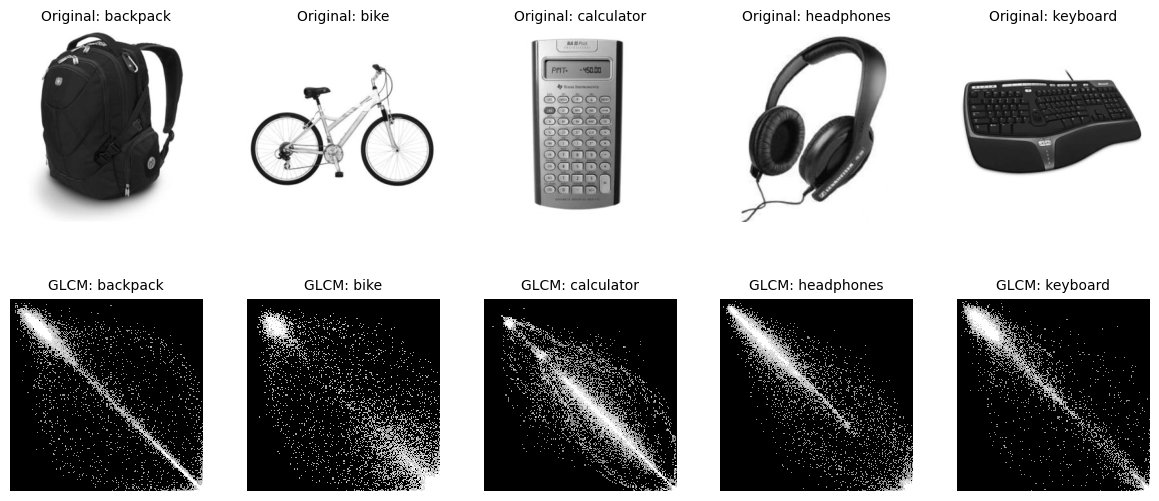

In [34]:
import cv2
import numpy as np
from skimage.exposure import equalize_hist
import matplotlib.pyplot as plt

def normalize_glcm(glcm, clip_percentile=99):
    """
    Normalize the GLCM for visualization, applying thresholding and scaling.
    """
    # Clip extremely small values (optional)
    max_value = np.percentile(glcm, clip_percentile)  # Top percentile of values
    glcm[glcm > max_value] = max_value  # Clip outliers

    # Normalize GLCM to 0-255
    glcm_normalized = (glcm / max_value * 255).astype(np.uint8)
    return glcm_normalized

def compute_and_visualize_glcm(image, distance=1, angle=0, levels=256, output_size=(300, 300)):
    """
    Compute and visualize GLCM for a given image with enhancements for better visualization.
    """
    # Convert to grayscale if necessary
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Compute GLCM
    glcm = compute_glcm(gray_image, distance, angle, levels=levels)

    # Normalize GLCM for visualization
    glcm_normalized = normalize_glcm(glcm, clip_percentile=99)

    # Resize GLCM to match the desired resolution
    glcm_resized = cv2.resize(glcm_normalized, output_size, interpolation=cv2.INTER_NEAREST)

    # Apply histogram equalization for better contrast
    glcm_equalized = equalize_hist(glcm_resized)  # Stretch to full dynamic range
    glcm_equalized = (glcm_equalized * 255).astype(np.uint8)

    return gray_image, glcm_equalized

# Assuming selected_images and selected_categories are defined
original_images = []
glcm_images = []

for image in selected_images:
    original, glcm = compute_and_visualize_glcm(image, distance=1, angle=0, levels=256, output_size=(300, 300))
    original_images.append(original)
    glcm_images.append(glcm)

def plot_glcm_results(original_images, glcm_images, categories):
    """
    Plot original images in a single row and their corresponding GLCMs in another row with specific labels.
    """
    num_categories = len(categories)
    
    # Create a grid with 2 rows: one for original images, one for GLCMs
    fig, axes = plt.subplots(2, num_categories, figsize=(15, 6))
    
    # Plot original images in the top row
    for i, category in enumerate(categories):
        axes[0, i].imshow(original_images[i], cmap='gray')
        axes[0, i].set_title(f"Original: {category}", fontsize=10)  # Dynamic title
        axes[0, i].axis('off')

    # Plot GLCMs in the bottom row
    for i, category in enumerate(categories):
        axes[1, i].imshow(glcm_images[i], cmap='gray', interpolation='nearest')
        axes[1, i].set_title(f"GLCM: {category}", fontsize=10)  # Dynamic title
        axes[1, i].axis('off')
    
    # Adjust spacing between plots
    plt.subplots_adjust(wspace=0.1, hspace=0.4)  # Adjust spacing between rows and columns
    
    plt.show()

# Assuming selected_categories is a list of category names
plot_glcm_results(original_images, glcm_images, selected_categories)


## Images of Each Class

In [2]:
#### Load in data ####

import os
import cv2
import numpy as np
import pandas as pd
from itertools import product
from tqdm import tqdm
from utils import load_images_by_domain, split_images

# Define paths
img_dir = "../OfficeCaltechDomainAdaptation/images"

# Load images by domain
data_by_domain = load_images_by_domain(
    img_dir=img_dir,
    target_size=(300, 300),  # Standardized size
    method="pad",           # Use padding to maintain aspect ratio
    seed=888                # Seed for reproducibility
)

# Split images: Combine amazon and caltech10 into train/val/test
train_data, val_data, test_data = split_images(
    data_by_domain=data_by_domain,
    train_domains=["amazon", "caltech10"],  # Combine these for training and validation
    test_domains=["dslr", "webcam"],                        # Use part of amazon and caltech10 for testing
    train_split=0.6,                        # 60% for training
    val_split=0.4,                          # 20% for validation
    use_train_for_test=False,                # Use part of train_domains for testing
    seed=888                                # Seed for reproducibility
)

# Summary of splits
print(f"Train images: {len(train_data['images'])}, Train labels: {len(train_data['labels'])}")
print(f"Validation images: {len(val_data['images'])}, Validation labels: {len(val_data['labels'])}")
print(f"Test images: {len(test_data['images'])}, Test labels: {len(test_data['labels'])}")

Train images: 1247, Train labels: 1247
Validation images: 832, Validation labels: 832
Test images: 452, Test labels: 452


In [ ]:
from utils import standardize_image, load_split_images
train, val, test = load_split_images(img_dir=img_dir)

In [ ]:
domain_caltech10 = np.where((train[0] == 'caltech10') & (train[1] == 'backpack'))[0]
domain_amazon = np.where((train[0] == 'amazon') & (train[1] == 'backpack'))[0]
domain_dslr = np.where((val[0] == 'dslr') & (val[1] == 'backpack'))[0]
domain_webcam = np.where((val[0] == 'webcam') & (val[1] == 'backpack'))[0]

In [186]:
np.random.seed(88888)
np.random.shuffle(domain_caltech10)
np.random.shuffle(domain_amazon)
np.random.shuffle(domain_dslr)
np.random.shuffle(domain_webcam)

In [187]:
domains = {
    'caltech10':[],
    'amazon':[],
    'dslr':[],
    'webcam':[]
}

for idx in domain_caltech10:
    try:
        domains['caltech10'].append(standardize_image(train[3][idx]))
    except:
        pass
    if len(domains['caltech10']) == 4:
        break
for idx in domain_amazon:
    try:
        domains['amazon'].append(standardize_image(train[3][idx]))
    except:
        pass
    if len(domains['amazon']) == 4:
        break
for idx in domain_dslr:
    try:
        domains['dslr'].append(standardize_image(val[3][idx]))
    except:
        pass
    if len(domains['dslr']) == 4:
        break
for idx in domain_webcam:
    try:
        domains['webcam'].append(standardize_image(val[3][idx]))
    except:
        pass
    if len(domains['webcam']) == 4:
        break

In [188]:
pd.DataFrame(train[0].tolist() + val[0].tolist() + test[0].tolist()).value_counts()

0        
caltech10    1123
amazon        958
webcam        295
dslr          157
Name: count, dtype: int64

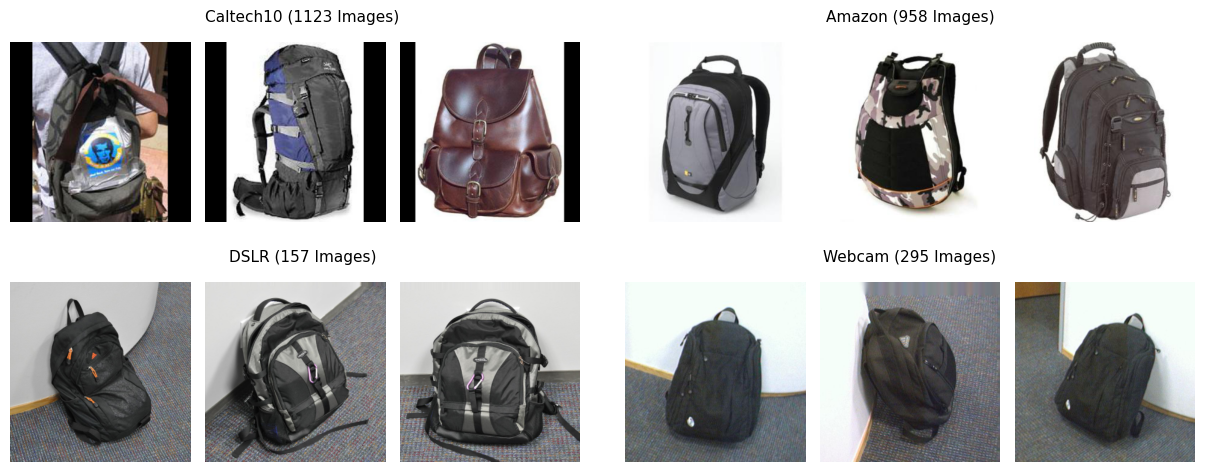

In [189]:
import matplotlib.patches as patches
def plot_img(ax, img, title=None):
    ax.imshow(img)
    # ax.set_title(title, fontsize=10)
    ax.axis('off')

    
# Create a grid with 2 rows: one for original images, one for GLCMs
fig, axes = plt.subplots(2, 6, figsize=(15, 6))

plot_img(axes[0, 0], domains['caltech10'][0], title='Caltech10')
plot_img(axes[0, 1], domains['caltech10'][1], title='Caltech10')
plot_img(axes[0, 2], domains['caltech10'][2], title='Caltech10')
plot_img(axes[0, 3], domains['amazon'][0], title='Amazon')
plot_img(axes[0, 4], domains['amazon'][1], title='Amazon')
plot_img(axes[0, 5], domains['amazon'][2], title='Amazon')
plot_img(axes[1, 0], domains['dslr'][0], title='DSLR')
plot_img(axes[1, 1], domains['dslr'][1], title='DSLR')
plot_img(axes[1, 2], domains['dslr'][2], title='DSLR')
plot_img(axes[1, 3], domains['webcam'][0], title='Webcam')
plot_img(axes[1, 4], domains['webcam'][1], title='Webcam')
plot_img(axes[1, 5], domains['webcam'][2], title='Webcam')

# Define custom spacing between columns 2 and 3
gap = 0.02  # This is the gap you want between columns 2 and 3

# Adjust the position of each subplot manually to control the spacing
# Columns 1 and 2 (keep them close together)
axes[0, 0].set_position([0.05, 0.5, 0.2, 0.3])  # Leftmost column
axes[0, 1].set_position([0.18, 0.5, 0.2, 0.3])  # Column 2, closer to column 1
axes[0, 2].set_position([0.31, 0.5, 0.2, 0.3])  # Column 2, closer to column 1

# Column 3 and 4 (keep them close together)
axes[0, 3].set_position([0.44 + gap, 0.5, 0.2, 0.3])  # Column 3, closer to column 2
axes[0, 4].set_position([0.57 + gap, 0.5, 0.2, 0.3])  # Column 4, closer to column 3
axes[0, 5].set_position([0.70 + gap, 0.5, 0.2, 0.3])  # Column 4, closer to column 3

# Columns 1 and 2, row 2 (keep them close together)
axes[1, 0].set_position([0.05, 0.1, 0.2, 0.3])  # Leftmost column
axes[1, 1].set_position([0.18, 0.1, 0.2, 0.3])  # Column 2, closer to column 1
axes[1, 2].set_position([0.31, 0.1, 0.2, 0.3])  # Column 2, closer to column 1

# Column 3 and 4, row 2 (keep them close together)
axes[1, 3].set_position([0.44 + gap, 0.1, 0.2, 0.3])  # Column 3, closer to column 2
axes[1, 4].set_position([0.57 + gap, 0.1, 0.2, 0.3])  # Column 4, closer to column 3
axes[1, 5].set_position([0.70 + gap, 0.1, 0.2, 0.3])  # Column 4, closer to column 3

fig.text(0.285, 0.83, 'Caltech10 (1123 Images)', ha='center', va='bottom', fontsize=11)
fig.text(0.69, 0.83, 'Amazon (958 Images)', ha='center', va='bottom', fontsize=11)
fig.text(0.285, 0.43, 'DSLR (157 Images)', ha='center', va='bottom', fontsize=11)
fig.text(0.69, 0.43, 'Webcam (295 Images)', ha='center', va='bottom', fontsize=11)

plt.show()